# Exploration

We will start to explore the dataset provided for this project. First, we will load the data and take a look at the first few rows.

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import pandas as pd
import nltk

In [2]:
df = pd.read_pickle("data/data_original.pkl")

print(df.shape)
df.head()

(416809, 2)


,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


Now, we will explore the distribution of the target variable, `emotions`.

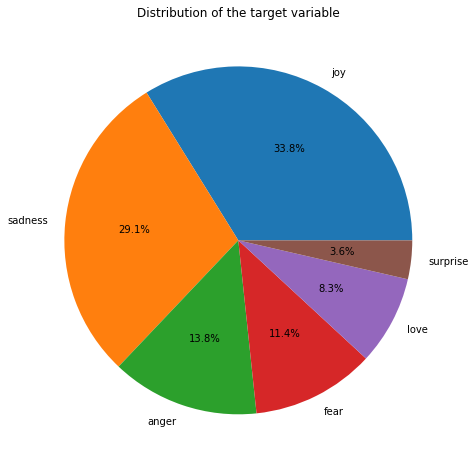

In [3]:
# Count the number of each class
class_counts = df['emotions'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,8), facecolor='white')
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of the target variable')
plt.show()

As we can see in the figure above, the dataset has some imbalance. The most frequent emotions are without a doubt, 'sadness' and 'joy'. Together, they represent more than half of the total dataset. However, if we consider the size of our data, even the least frequent emotions have a reasonable number of samples.

We will create now a word cloud to visualize the most frequent words in the dataset.

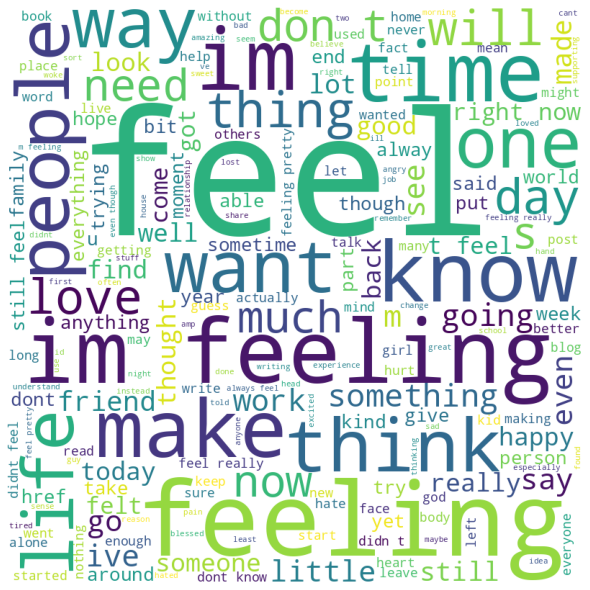

In [4]:
# Create a word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(df['text']))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Taking a look at the world cloud generated, we can indeed conclude the dataset is related to emotions, since some of the biggest words are related to this topic, such as 'feel', 'feeling', 'think', 'people', 'life', 'love'...

Now, let's see if for each of the classes we have, we can see a difference in the words that appear.

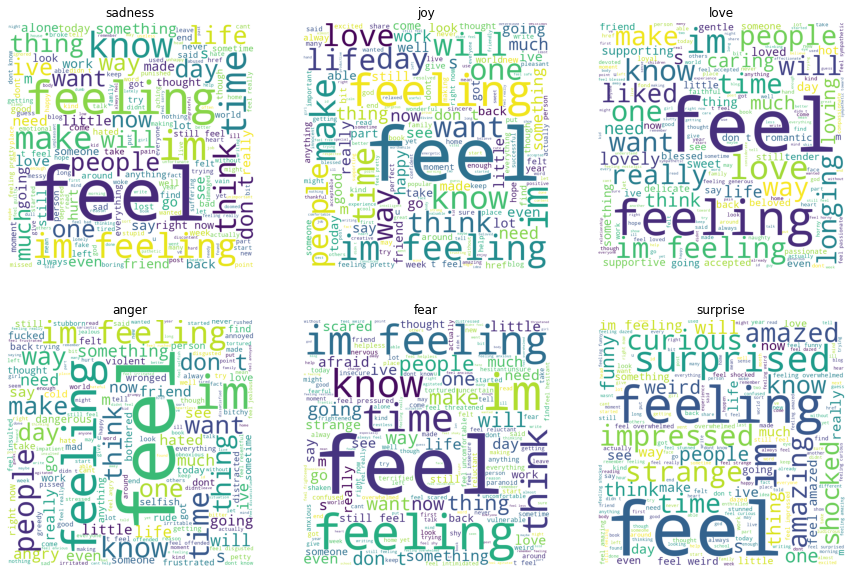

In [5]:
# Make six word clouds, one for each class and plot them in a 2x3 grid
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, emotion in enumerate(df['emotions'].unique()):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(df[df['emotions'] == emotion]['text']))
    ax[i//3, i%3].imshow(wordcloud)
    ax[i//3, i%3].axis("off")
    ax[i//3, i%3].set_title(emotion)

The first thing that we notice is the words 'feel'/'feeling', still have a very big presence in all of the classes. This is expected, since the dataset is about emotions. 
Now, taking a look at each class:
- Sadness: we can see words such as 'alone', 'hurt', 'hated', 'discontent', 'punished', 'tired', 'dull', 'missed', 'pain', but we can also see 'love', which might be mostly used in a negative context.
- Joy: we can see words such as 'love', 'happy', 'good', 'excited', 'positive', 'relaxed', 'kind', 'creative', 'resolved', 'amazing', 'successful', 'pretty'.
- Love: we can see words such as 'love', 'liked', 'longing', 'faithful', 'blessed', 'delicate', 'lovely', 'caring', 'loyal', 'sweet'.
- Anger: we can see words such as 'hated', 'irritated', 'disgusted', 'fucked', 'petty', 'pissed', 'distracted', 'bothered', 'mad'.
- Fear: we can see words such as 'fear', 'uncomfortable', 'nervous', 'paranoid', 'little', 'tortured', 'strange', 'insecure', 'terrified', 'confused'.
- Surprise: we can see words such as 'amazing', 'surprised'. 'shocked', 'curious', 'impressed', 'funny', 'amaze', 'weird', 'dazed', 'stunned'.

The words appear as we expect them, even though there are a few cases where words don't match the class they were assigned.

Now let's explore the words count distribution for each sentence.

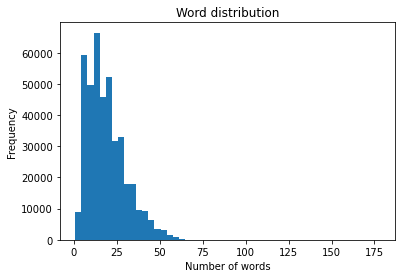

In [6]:
# Word count distribution
word_distribution = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
plt.hist(word_distribution, bins=50)
plt.title('Word distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.show()

As we can see the number of words per entry is somewhat consistent.

Now we will explore the frequency of each word in our dataset. We will start with a simple aproach.

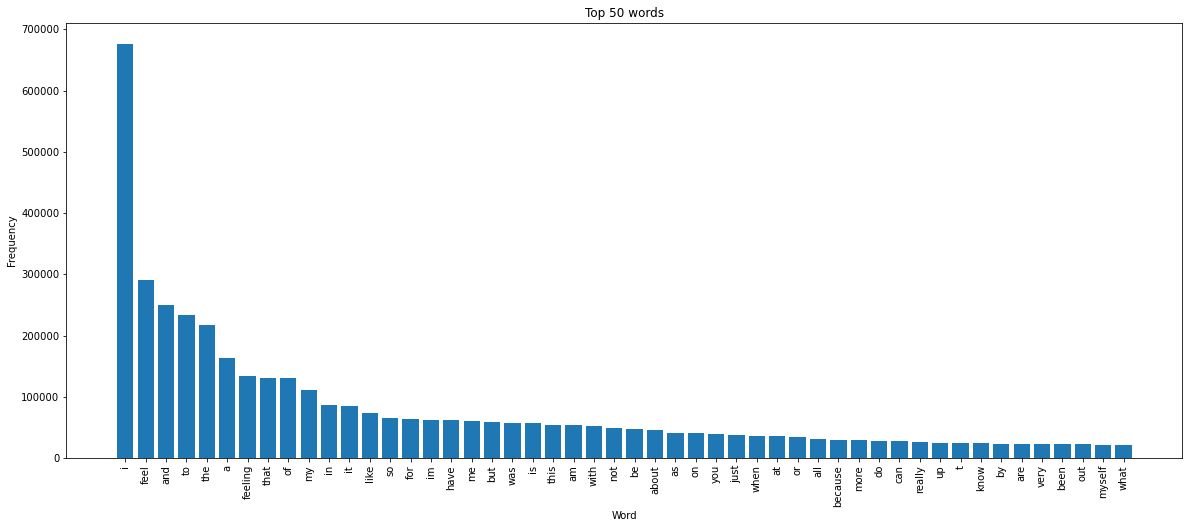

Number of unique words: 75297


In [7]:
# Number of different words and their frequency

# Create a list of all the words using the word_tokenize function
all_words = [word for text in df['text'] for word in nltk.word_tokenize(text)]

# Count the frequency of each word
word_freq = Counter(all_words)

# Create a dataframe
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Sort the dataframe
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Plot the frequency of the top words
plt.figure(figsize=(20,8))
plt.bar(word_freq_df['word'][:50], word_freq_df['frequency'][:50])
plt.title('Top 50 words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


# Count the number of unique words
unique_words = len(set(all_words))
print(f'Number of unique words: {unique_words}')

As we can see there are a lot of stop words present in the graph above, we can remove them as they don't bring much information into this part of the exploration. We can also filter the non alpha words.

In [8]:
from nltk.corpus import stopwords

# Remove non-alphabetic characters
all_words = [word for word in all_words if word.isalpha()]

# Remove stop words
all_words = [word for word in all_words if word not in nltk.corpus.stopwords.words('english')]

# Count the frequency of each word
word_freq = Counter(all_words)

# Create a dataframe
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Sort the dataframe
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Plot the frequency of the top words
plt.figure(figsize=(20,8))
plt.bar(word_freq_df['word'][:50], word_freq_df['frequency'][:50])
plt.title('Top 50 words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

KeyboardInterrupt: 

That looks much better. Now, let's try a more refined approach to place more relevant words at the top of the graph. We can remove very small words, and remove some of the top words that can be very ambiguous.

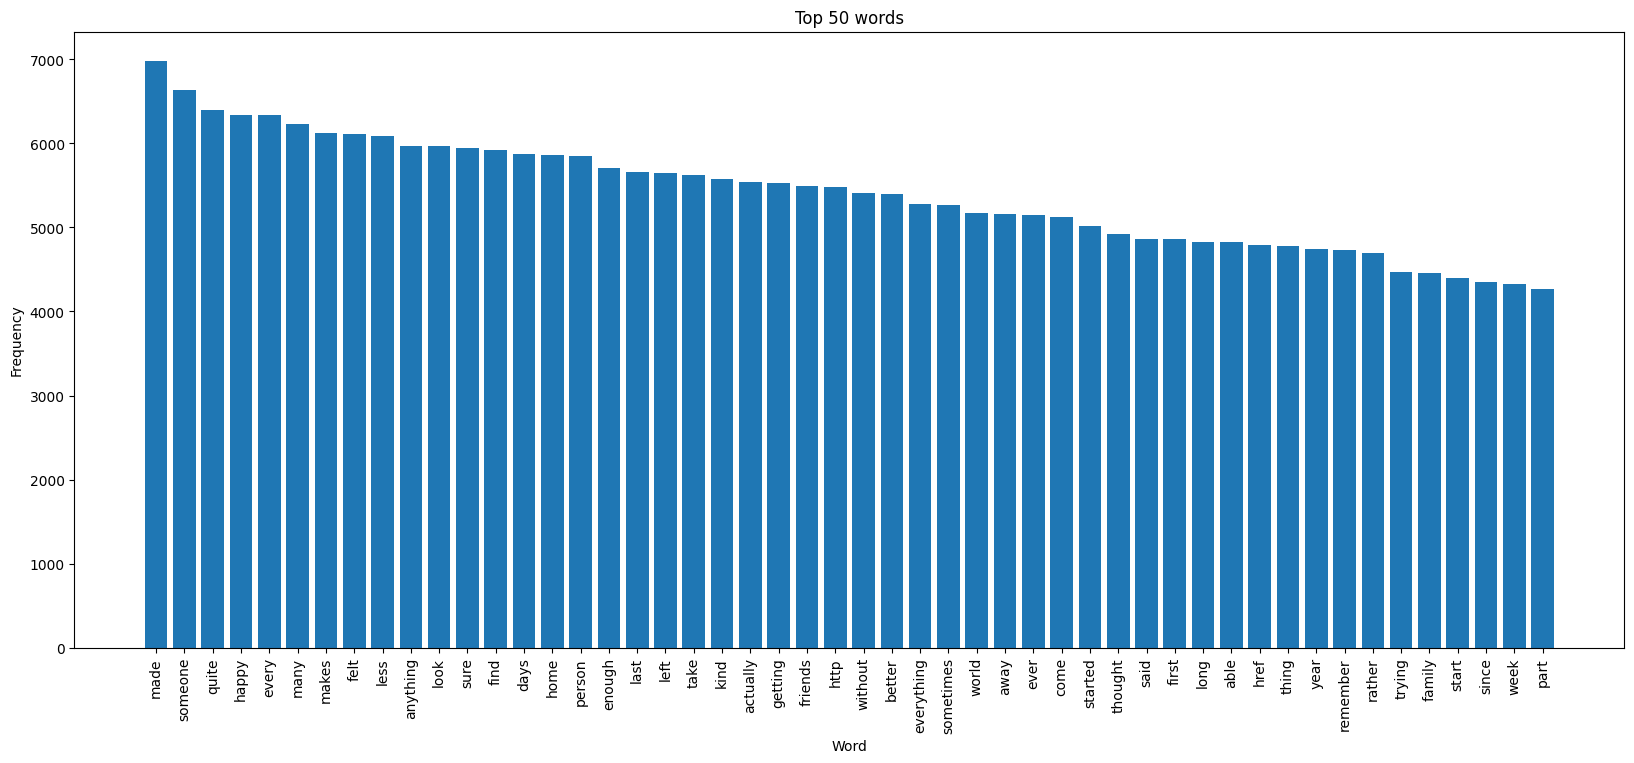

In [ ]:
# Remove words that are too short
all_words_mr = [word for word in all_words if len(word) > 2]

# Remove words that are too frequent using word_freq_df
aux = set(word_freq_df['word'][:50].values)
all_words_mr = [word for word in all_words_mr if word not in aux]

# Remove useless words
useless = {
'time', 'little', 'would', 'still', 'even',
'dont', 'much', 'things', 'something', 'going', 'make', 'could',
'back', 'right', 'cant', 'well', 'pretty', 'also', 'always'}

all_words_mr = [word for word in all_words_mr if word not in useless]

# Count the frequency of each word
word_freq = Counter(all_words_mr)

# Create a dataframe
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])

# Sort the dataframe
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Plot the frequency of the top words
plt.figure(figsize=(20,8))
plt.bar(word_freq_df['word'][:50], word_freq_df['frequency'][:50])
plt.title('Top 50 words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


Now, instead of trying to remove some of the less relevant words, we can try to use the tf-idf score to see which words are the most relevant to the text.

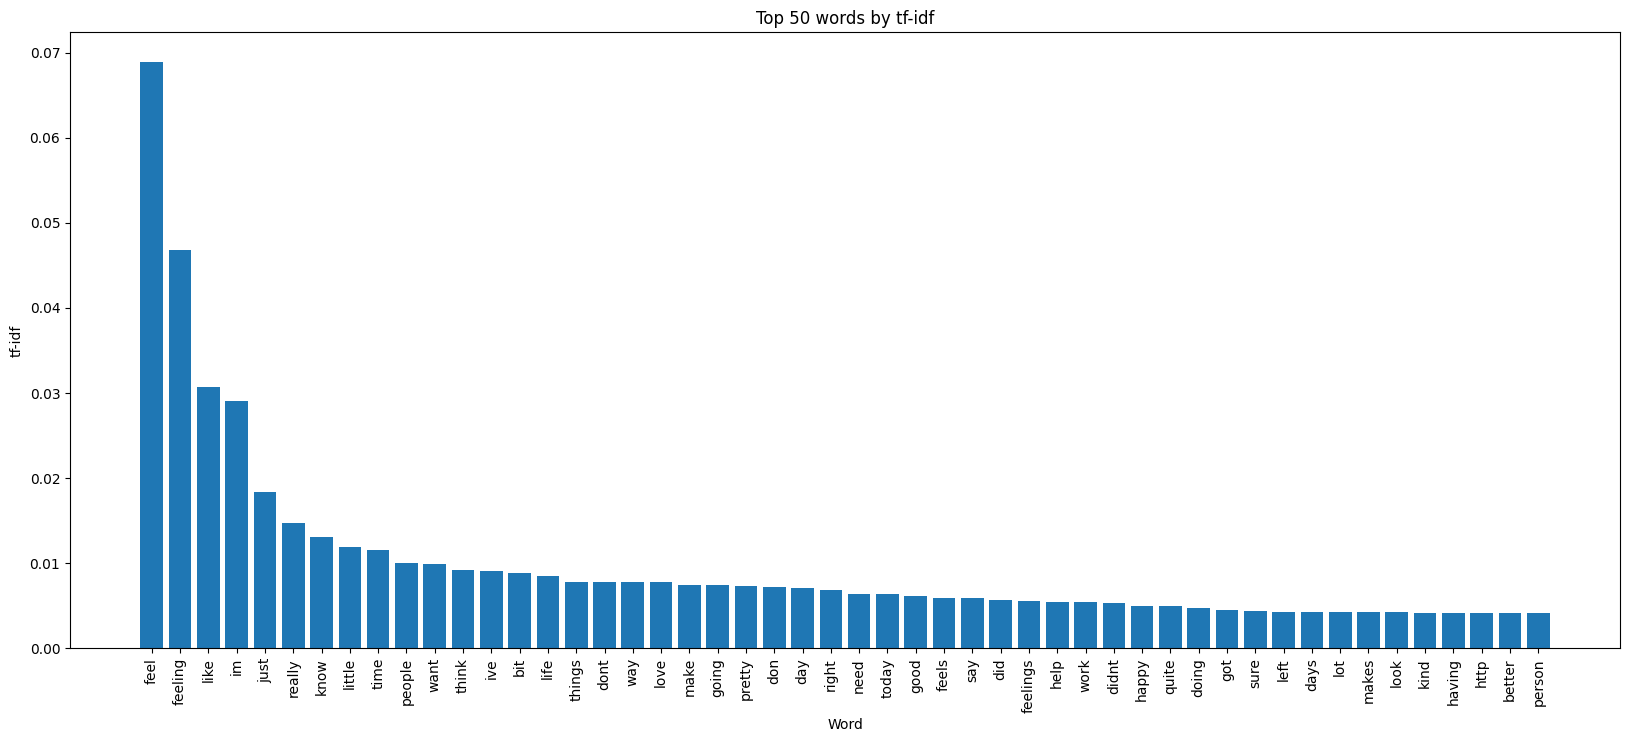

In [ ]:
# Sort the word distribution by tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit the vectorizer
tfidf.fit(df['text'])

# Transform the text
text_tfidf = tfidf.transform(df['text'])

# Create a dataframe
text_tfidf_df = pd.DataFrame(text_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Create a dataframe with the mean tf-idf value for each word
mean_tfidf = text_tfidf_df.mean().sort_values(ascending=False)

# Plot the frequency of the top words
plt.figure(figsize=(20,8))
plt.bar(mean_tfidf.index[:50], mean_tfidf.values[:50])
plt.title('Top 50 words by tf-idf')
plt.xlabel('Word')
plt.ylabel('tf-idf')
plt.xticks(rotation=90)
plt.show()

Let's take a look at how many unique words we have in our dataset for each class.

emotions
anger       28437
fear        24537
joy         47337
love        24414
sadness     38612
surprise    14643
Name: text, dtype: int64


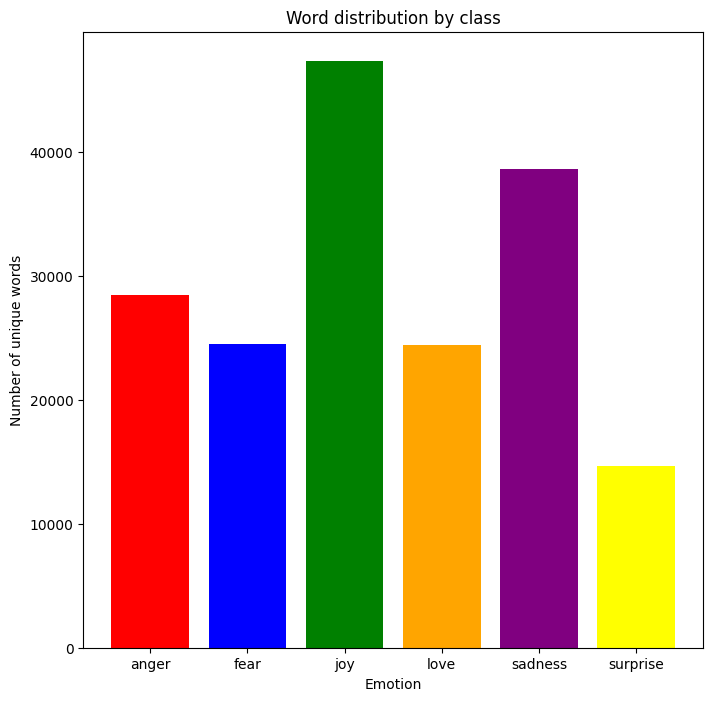

In [ ]:
# Word distribution by class
word_distribution_by_class = df.groupby('emotions')['text'].apply(lambda x: len(set(nltk.word_tokenize(' '.join(x)))))

print(word_distribution_by_class)
""" emotions
anger       28441
fear        24539
joy         47342
love        24417
sadness     38615
surprise    14645
Name: text, dtype: int64 """

# Define a color palette
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Plot the word distribution by class
plt.figure(figsize=(8,8), facecolor='white')
plt.bar(word_distribution_by_class.index, word_distribution_by_class.values, color=colors)
plt.title('Word distribution by class')
plt.xlabel('Emotion')
plt.ylabel('Number of unique words')
plt.show()

As we can see, the number of unique words is very similar for each class. This is expected, since the dataset is about emotions, and the words used to express them are very similar.

Now, let's take a look at the most frequent words for each class.

In [ ]:
# Top 20 most common words by class

# Create a dictionary to store the top 10 words by class
import nltk
top_words = {} 

stop_words = set(nltk.corpus.stopwords.words('english'))

# Loop through each class
for emotion in df['emotions'].unique():
    # Create a list of all the words for that class using the word_tokenize function
    all_words = nltk.word_tokenize(' '.join(df[df['emotions'] == emotion]['text']))
    
    # Remove non-alphabetic characters
    all_words = [word for word in all_words if word.isalpha()]
    
    # Remove stop words
    all_words = [word for word in all_words if word not in stop_words]
    
    # Remove words that are too short
    all_words = [word for word in all_words if len(word) > 2]
    
    # Remove words that are too frequent using word_freq_df
    aux = set(word_freq_df['word'][:50].values)
    all_words = [word for word in all_words if word not in aux]
    
    # Remove useless words
    useless = {
    'time', 'little', 'would', 'still', 'even',
    'dont', 'much', 'things', 'something', 'going', 'make', 'could',
    'back', 'right', 'cant', 'well', 'pretty', 'also', 'always'}
    
    all_words_ru = [word for word in all_words if word not in useless]

    # Count the frequency of each word
    word_freq = Counter(all_words_ru)
    
    # Sort the dictionary
    word_freq = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True))
    
    # Store the top 10 words
    top_words[emotion] = list(word_freq.keys())[:20]
    
# Create a dataframe
top_words_df = pd.DataFrame(top_words)

# Print the dataframe
print(top_words_df)

     sadness      joy         love       anger           fear     surprise
0       feel     feel         feel        feel           feel         feel
1    feeling  feeling      feeling     feeling        feeling      feeling
2       like     like         like        like           like         like
3     really   really         love      really           know       amazed
4       know     know       really        know         really    impressed
5        get      get         know         get            bit        weird
6        ive   people       people      people            get      strange
7     people      one          one        want         people  overwhelmed
8       want     want        loved       angry          think    surprised
9      think     love       loving       think           want      amazing
10       one     life         want         one         scared      shocked
11      life    think          hot         bit         afraid        funny
12       bit     good    

As we can see the top 3 words are the same, since they are very common words when talking about feelings. Other words are still very similar, but we can see some differences between the classes, just like in the word cloud.

Now we will take a look at the negative words for each class, this might justify the appearance of some words in the word cloud that we didn't expect.

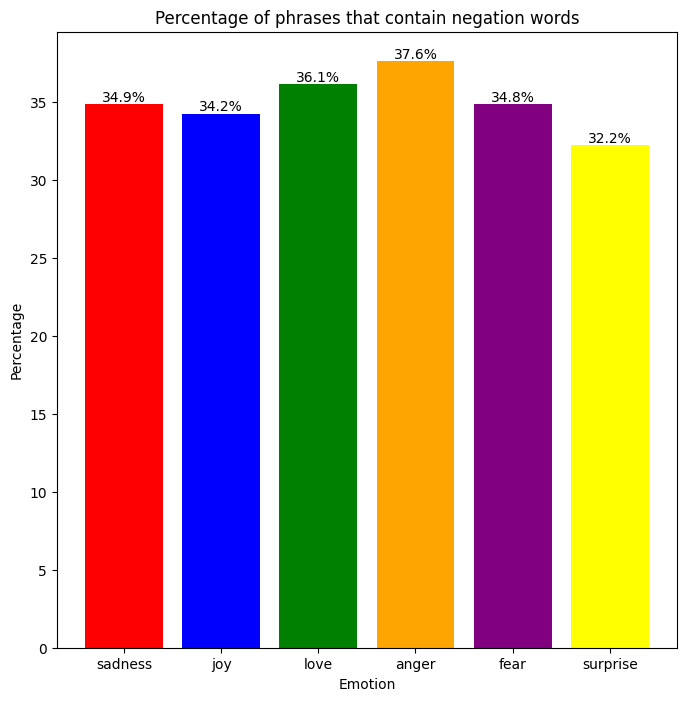

In [ ]:
# Check percentage of phrases per class that contain negation words

# Define a list of negation words
negation_words = {'no', 'not', 'never', 'none', 'nobody', 'nowhere', 'nothing', 'noone', 'rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor', 'cannot', 'dont' 'wont', 'cant', 'isnt', 'arent', 'wasnt', 'werent', 'shouldnt', 'wouldnt', 'couldnt', 'wont', 'didnt', 'cant', 'couldnt', 'mustnt'}

# Create a list to store the percentage of phrases that contain negation words
negation_percentage = []

# Loop through each class
for emotion in df['emotions'].unique():
    # Create a list of all the phrases for that class
    all_phrases = df[df['emotions'] == emotion]['text']
    
    # Count the number of phrases that contain negation words
    phrases_with_negation = all_phrases.apply(lambda x: any(word in x for word in negation_words)).sum()
    
    # Calculate the percentage of phrases that contain negation words
    percentage = phrases_with_negation / len(all_phrases) * 100
    
    # Store the percentage
    negation_percentage.append(percentage)
    
# Create a dataframe
negation_percentage_df = pd.DataFrame(negation_percentage, index=df['emotions'].unique(), columns=['percentage'])

# Plot the percentage of phrases that contain negation words
plt.figure(figsize=(8,8), facecolor='white')
plt.bar(negation_percentage_df.index, negation_percentage_df['percentage'], color=colors)
plt.title('Percentage of phrases that contain negation words')
plt.xlabel('Emotion')
plt.ylabel('Percentage')

# Add value annotations to the bars
for i, percentage in enumerate(negation_percentage_df['percentage']):
    plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

The presence of negative words are similar for each class, so can't really justify the appearance of some words in the word cloud, for now. Later we will use n-grams to see if we can justify the appearance of some words.

For now, let's explore the presence of some words for each class that might be relevant.

In [ ]:
def findWordPercentage(word):
    # Percentage of phrases that contain "love" per class

    # Create a list to store the percentage of phrases that contain the word "love"
    word_perc = []

    # Loop through each class
    for emotion in df['emotions'].unique():
        # Create a list of all the phrases for that class
        all_phrases = df[df['emotions'] == emotion]['text']
        
        # Count the number of phrases that contain the word
        phrases_with_love = all_phrases.apply(lambda x: word in x).sum()
        
        # Calculate the percentage of phrases that contain the word
        percentage = phrases_with_love / len(all_phrases) * 100
        
        # Store the percentage
        word_perc.append(percentage)
        
    # Create a dataframe
    love_percentage_df = pd.DataFrame(word_perc, index=df['emotions'].unique(), columns=['percentage'])

    # Plot the percentage of phrases that contain the word "love"
    plt.figure(figsize=(8,8), facecolor='white')
    plt.bar(love_percentage_df.index, love_percentage_df['percentage'], color=colors)
    plt.title(f'Percentage of phrases that contain the word "{word}"')
    plt.xlabel('Emotion')
    plt.ylabel('Percentage')

    # Add value annotations to the bars
    for i, percentage in enumerate(love_percentage_df['percentage']):
        plt.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom')
        
    plt.show()
    
    print("The word " + word + " is present a total of " + str(round(sum(word_perc),1)) + "% of the time in the dataset")

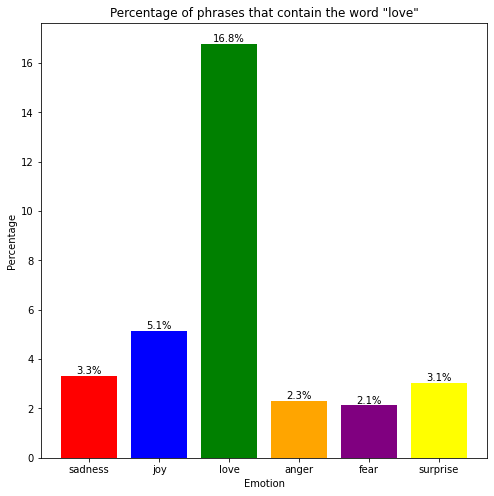

The word love is present a total of 32.7% of the time in the dataset


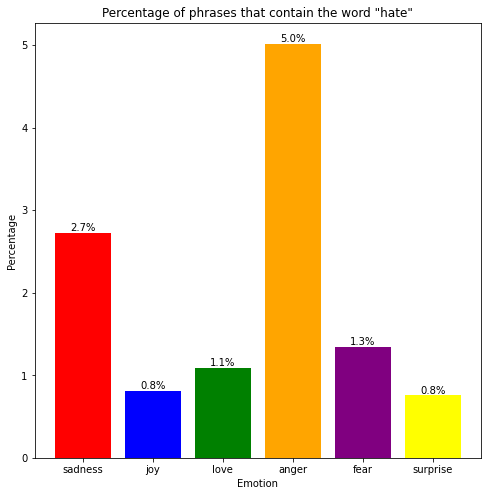

The word hate is present a total of 11.7% of the time in the dataset


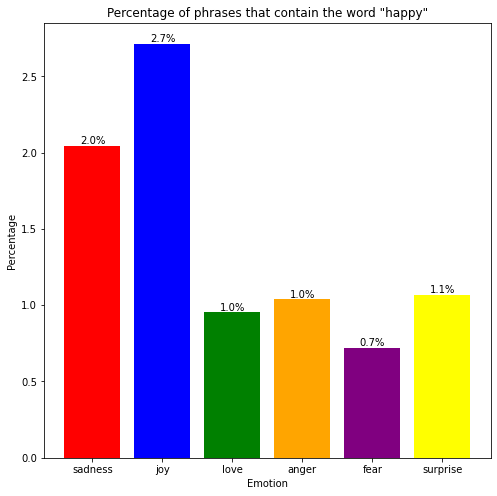

The word happy is present a total of 8.5% of the time in the dataset


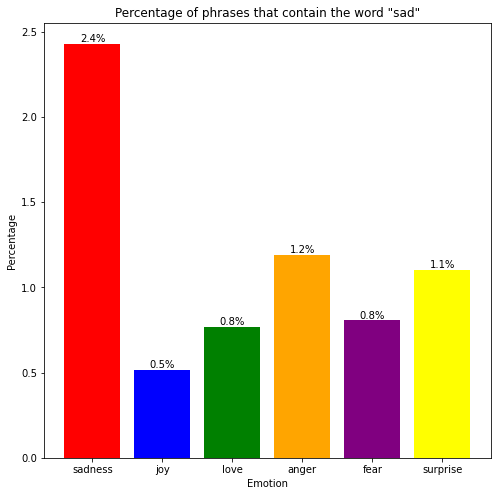

The word sad is present a total of 6.8% of the time in the dataset


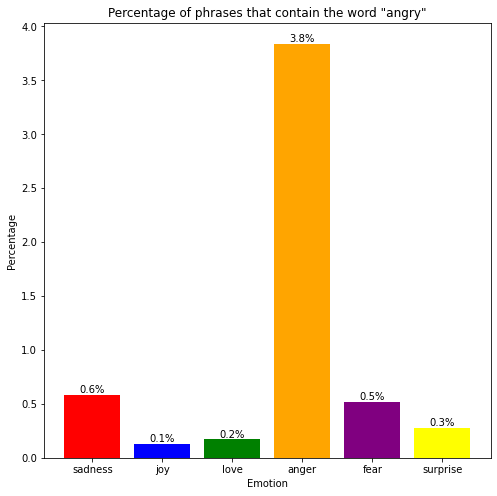

The word angry is present a total of 5.5% of the time in the dataset


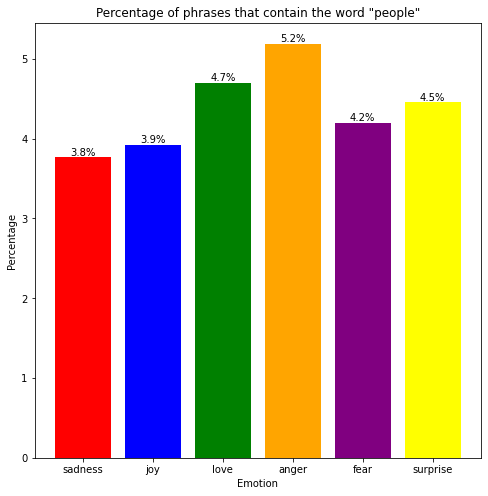

The word people is present a total of 26.2% of the time in the dataset


In [ ]:
findWordPercentage('love')
findWordPercentage('hate')
findWordPercentage('happy')
findWordPercentage('sad')
findWordPercentage('angry')
findWordPercentage('people')

The values are expected for most of the words searched, but there are some interesting results. For example, the word 'sad' had a very high presence in the class sadness, as expected, but it also had a high presence in the class joy! Once again, this might be due to the use of negation.

Now, let's explore the use of some n-grams for each class, that might justify the appearance of some words we were expecting.

In [ ]:
from collections import defaultdict
from nltk import bigrams


# not, dont (like),  
# Create a bigram model, and check the probability of the words that follow the word "don't" for each class
list_of_bigrams_models = {}

# Loop through each phrase
for emotion in df['emotions'].unique():
    # Create a list of all the phrases for that class
    all_phr = df[df['emotions'] == emotion]['text']
    
    # Initialize the bigram model for each emotion
    bi_model = defaultdict(lambda: defaultdict(lambda: 0))
    
    for sent in all_phr:
        # Create a bigram model
        for w1, w2 in bigrams(nltk.word_tokenize(sent), pad_right=True, pad_left=True):
            bi_model[w1][w2] += 1

    # Transform the counts to probabilities
    for w1 in bi_model:
        total_count = float(sum(bi_model[w1].values()))
        for w2 in bi_model[w1]:
            bi_model[w1][w2] /= total_count

    # Store the bigram model
    list_of_bigrams_models[emotion] = bi_model

Now that we have the bigram model, let's see if the words that follow a negation can justify the appearance of some unexpected words that we saw above. For example, happy was very present in the sadness class.

In [ ]:
# Check the probability of happy appearing after the word not for each class
for emotion in list_of_bigrams_models:
    print(f'Emotion: {emotion}')
    print(f'Probability of the words that follow the word "not": {list_of_bigrams_models[emotion]["not"]["happy"]}')

print()
# Check the probability of happy appearing after the word wasnt for each class
for emotion in list_of_bigrams_models:
    print(f'Emotion: {emotion}')
    print(f'Probability of the words that follow the word "wasnt": {list_of_bigrams_models[emotion]["wasnt"]["happy"]}')
    
print()

Emotion: sadness
Probability of the words that follow the word "not": 0.002589585666293393
Emotion: joy
Probability of the words that follow the word "not": 0.0019883040935672514
Emotion: love
Probability of the words that follow the word "not": 0.0011340440009072353
Emotion: anger
Probability of the words that follow the word "not": 0.0016896648831315122
Emotion: fear
Probability of the words that follow the word "not": 0.001671309192200557
Emotion: surprise
Probability of the words that follow the word "not": 0.0019144862795149968

Emotion: sadness
Probability of the words that follow the word "wasnt": 0.005952380952380952
Emotion: joy
Probability of the words that follow the word "wasnt": 0.0045045045045045045
Emotion: love
Probability of the words that follow the word "wasnt": 0.007905138339920948
Emotion: anger
Probability of the words that follow the word "wasnt": 0.013468013468013467
Emotion: fear
Probability of the words that follow the word "wasnt": 0.004366812227074236
Emotio

So, as we can see the probability that the word 'happy' appears after 'not' or 'wasnt' is higher in the sadness class, than in the joy class. This might justify the appearance of the word 'happy' in the sadness class.

In [ ]:
# Check the probability of like appearing after the word dont for each class
for emotion in list_of_bigrams_models:
    print(f'Emotion: {emotion}')
    print(f'Probability of the words that follow the word "dont": {list_of_bigrams_models[emotion]["dont"]["like"]}')

print()

# Check the probability of love appearing after the word dont for each class
for emotion in list_of_bigrams_models:
    print(f'Emotion: {emotion}')
    print(f'Probability of the words that follow the word "dont": {list_of_bigrams_models[emotion]["dont"]["love"]}')


Emotion: sadness
Probability of the words that follow the word "dont": 0.04402821697883726
Emotion: joy
Probability of the words that follow the word "dont": 0.03207261724659607
Emotion: love
Probability of the words that follow the word "dont": 0.038135593220338986
Emotion: anger
Probability of the words that follow the word "dont": 0.05320108205590622
Emotion: fear
Probability of the words that follow the word "dont": 0.0491183879093199
Emotion: surprise
Probability of the words that follow the word "dont": 0.03225806451612903

Emotion: sadness
Probability of the words that follow the word "dont": 0.004135246898564826
Emotion: joy
Probability of the words that follow the word "dont": 0.0027231467473524964
Emotion: love
Probability of the words that follow the word "dont": 0.00211864406779661
Emotion: anger
Probability of the words that follow the word "dont": 0.002705139765554554
Emotion: fear
Probability of the words that follow the word "dont": 0.001889168765743073
Emotion: surpris

A similar thing happens with the words 'love' and 'like', whch are much more likely to appear after the word 'dont' in the sadness class and in the anger class, than in the joy class.

This justifies the appearance of these unexpected words in the previous results.